In [50]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [51]:
# Step a

w0 =  np.random.uniform(-1/4, 1/4, 1)[0]
w0

-0.041488997648713

In [52]:
# Step b

w1 =  np.random.uniform(-1, 1, 1)[0]
w1

0.4406489868843162

In [53]:
# Step c

w2 =  np.random.uniform(-1, 1, 1)[0]
w2

-0.9997712503653102

In [54]:
S = np.random.uniform(-1, 1, (100, 2))
S.shape

(100, 2)

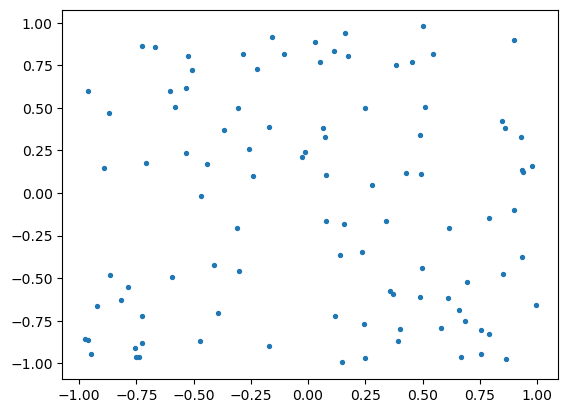

In [55]:
plt.scatter(S[:, 0], S[:, 1], s=8)

In [56]:
W_tb = np.array([w0, w1, w2])
X = np.insert(S, 0, np.ones(100), axis=1)
Y = X @ W_tb.T
T_tb = Y >= 0
T_tb.shape, Y.shape

((100,), (100,))

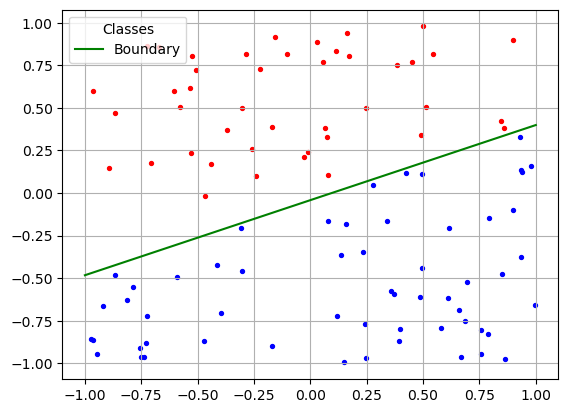

In [57]:
for i in range(S.shape[0]):
    if T_tb[i]:
        c = 'b'
    else:
        c = 'r'
    plt.scatter(S[i, 0], S[i, 1], color=c, s=8)
x2 = lambda x1: ((w0 + w1 * x1) / -w2)
x1 = np.arange(-1, 2)
plt.plot(x1, x2(x1), color='g', label='Boundary')
plt.legend(title='Classes', loc="upper left")
plt.grid()
plt.show()

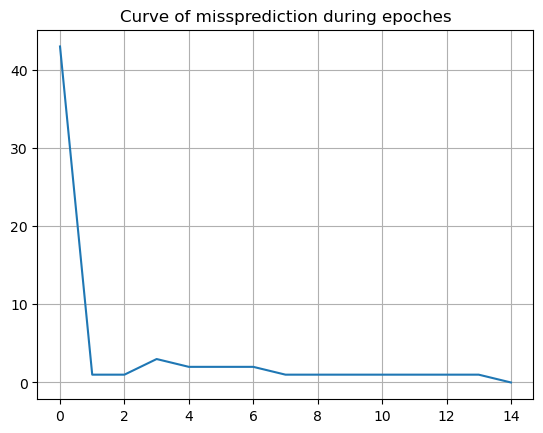

In [58]:
# Hyperparameter
n = 1
epoch_number = 100

# Parameters
W = np.random.uniform(-1, 1, 3)

# History Trace
history_miss = list()

# Online Version
for epoch in range(epoch_number):
    T = np.heaviside(X @ W.T, 0)
    history_miss.append(np.logical_and(T, np.logical_not(T_tb)).sum())
    if history_miss[-1] == 0:
        break
    for index, x in enumerate(X):
        y = np.heaviside(x @ W.T, 0)
        if T_tb[index] == 0 and y == 1:
            W = W - n * x
        elif T_tb[index] == 1 and y == 0:
            W = W + n * x

plt.plot(history_miss, label='History')
plt.title("Curve of missprediction during epoches")
plt.grid()
